# 静态网络（ER、WS、BA）拆解实验（Network Dismantling Trials）

## 输出（Out Put）

拆解实验的指标（输出分析）：
📝每步记录：
·最大联通子图比例S（q），其中q是移除节点数比例；
·节点总数N，逐步移除q·N个节点；
·可绘制S（q）对q的曲线（鲁棒性曲线）；
·计算鲁棒性积分指标$R = \frac{1}{N} \sum_{Q=1}^{N} S(Q)$


## 随机攻击

### 对BA 网络进行随机攻击

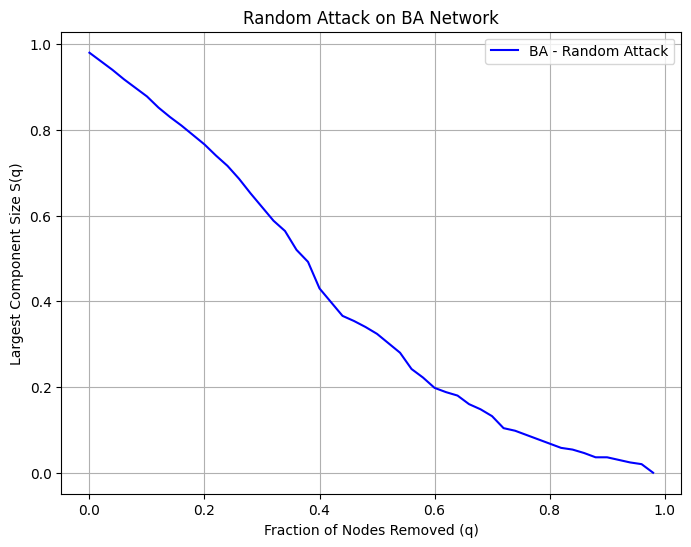

In [1]:
# 随机攻击：随机移除节点（或边）
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def random_attack(G, trials=1):
    """
    对网络 G 进行随机攻击，记录每一步最大连通子图比例 S(q)
    参数：
        G : networkx 图（无向图）
        trials : 重复试验次数，默认1次
    返回：
        q_list: 节点移除比例列表
        S_avg: 每一步最大连通子图比例的平均值（q -> S(q)）
    """
    N = G.number_of_nodes()
    S_all = np.zeros(N)

    for _ in range(trials):
        G_tmp = copy.deepcopy(G)
        nodes = list(G_tmp.nodes())
        np.random.shuffle(nodes)

        S_list = []
        for i, node in enumerate(nodes):
            G_tmp.remove_node(node)
            if G_tmp.number_of_nodes() == 0:
                S_list.append(0)
            else:
                largest_cc = max(nx.connected_components(G_tmp), key=len)
                S_list.append(len(largest_cc) / N)

        S_all += np.array(S_list)

    S_avg = S_all / trials
    q_list = np.arange(N) / N
    return q_list, S_avg

# 示例：对 BA 网络进行随机攻击
G_ba = nx.barabasi_albert_graph(n=50, m=2)
q, S = random_attack(G_ba, trials=10)

# 绘图展示
plt.figure(figsize=(8, 6))
plt.plot(q, S, label='BA - Random Attack', color='blue')
plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Random Attack on BA Network")
plt.grid(True)
plt.legend()
plt.show()

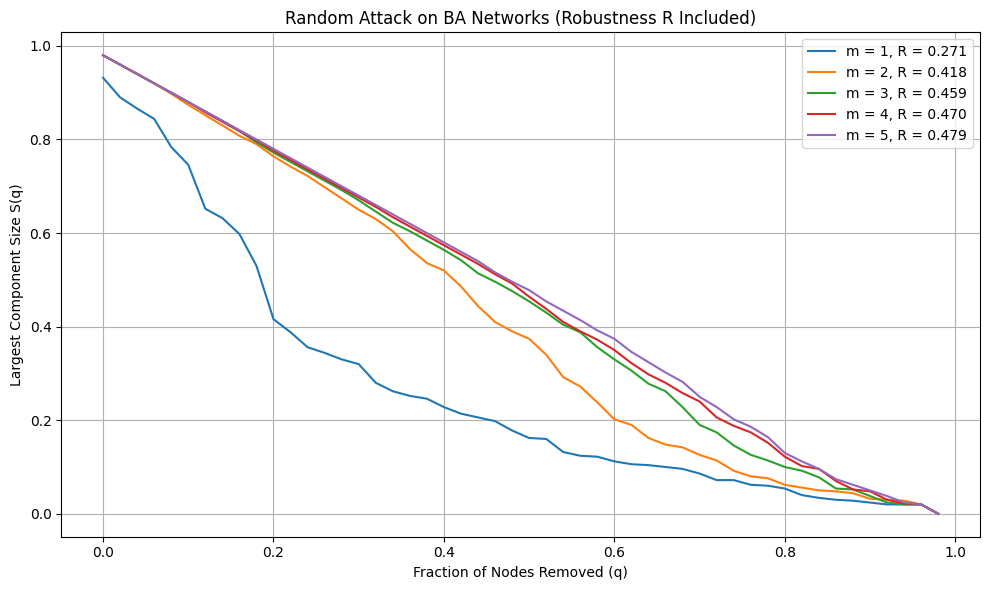

In [1]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def generate_ba_with_embedding(n, m, space_size=100):
    G = nx.barabasi_albert_graph(n=n, m=m)
    positions = {i: np.random.rand(2) * space_size for i in G.nodes()}
    nx.set_node_attributes(G, positions, 'pos')
    for u, v in G.edges():
        dist = np.linalg.norm(np.array(positions[u]) - np.array(positions[v]))
        G[u][v]['weight'] = dist
    return G

def random_attack(G, trials=5):
    N = G.number_of_nodes()
    S_all = np.zeros(N)

    for _ in range(trials):
        G_tmp = copy.deepcopy(G)
        nodes = list(G_tmp.nodes())
        np.random.shuffle(nodes)

        S_list = []
        for i, node in enumerate(nodes):
            G_tmp.remove_node(node)
            if G_tmp.number_of_nodes() == 0:
                S_list.append(0)
            else:
                largest_cc = max(nx.connected_components(G_tmp), key=len)
                S_list.append(len(largest_cc) / N)
        S_all += np.array(S_list)

    S_avg = S_all / trials
    q_list = np.arange(N) / N
    return q_list, S_avg

def compute_robustness(S_list):
    return np.sum(S_list) / len(S_list)

# 参数设置
n = 50
m_values = [1, 2, 3, 4, 5]
results = {}

for m in m_values:
    G = generate_ba_with_embedding(n=n, m=m)
    q, S = random_attack(G, trials=10)
    R = compute_robustness(S)
    results[m] = (q, S, R)

# 绘图
plt.figure(figsize=(10, 6))
for m in m_values:
    q, S, R = results[m]
    plt.plot(q, S, label=f'm = {m}, R = {R:.3f}')

plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Random Attack on BA Networks (Robustness R Included)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

参数m是：每个新节点连接的已有节点数，尽管是随机攻击，hub未必优先受影响，因此BA网络在中高m时非常鲁棒。

### 对WS网络进行随机攻击

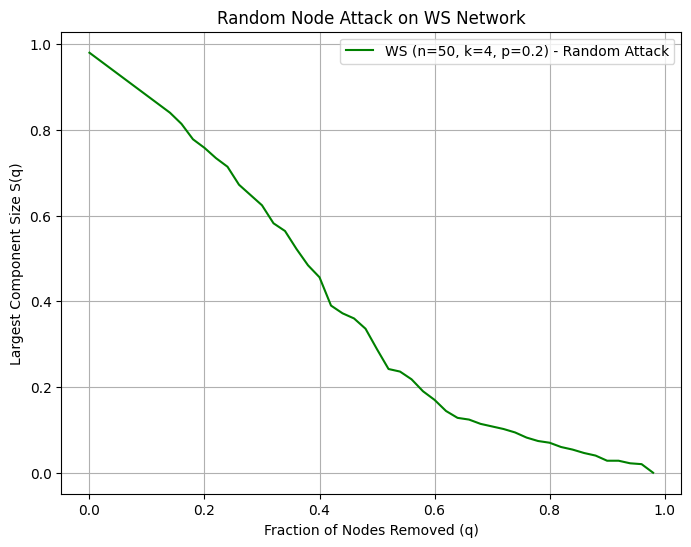

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def generate_ws_with_embedding(n=50, k=4, p=0.2, space_size=100):
    G = nx.watts_strogatz_graph(n=n, k=k, p=p)
    positions = {i: np.random.rand(2) * space_size for i in G.nodes()}
    nx.set_node_attributes(G, positions, 'pos')

    for u, v in G.edges():
        dist = np.linalg.norm(np.array(positions[u]) - np.array(positions[v]))
        G[u][v]['weight'] = dist

    return G, positions

def random_attack(G, trials=1):
    N = G.number_of_nodes()
    S_all = np.zeros(N)

    for _ in range(trials):
        G_tmp = copy.deepcopy(G)
        nodes = list(G_tmp.nodes())
        np.random.shuffle(nodes)

        S_list = []
        for i, node in enumerate(nodes):
            G_tmp.remove_node(node)
            if G_tmp.number_of_nodes() == 0:
                S_list.append(0)
            else:
                largest_cc = max(nx.connected_components(G_tmp), key=len)
                S_list.append(len(largest_cc) / N)

        S_all += np.array(S_list)

    S_avg = S_all / trials
    q_list = np.arange(N) / N
    return q_list, S_avg

# 🔧 参数设置
n = 50
k = 4
p = 0.2
trials = 10

# 生成 WS 网络并执行随机攻击
G_ws, pos_ws = generate_ws_with_embedding(n=n, k=k, p=p)
q, S = random_attack(G_ws, trials=trials)

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(q, S, label=f'WS (n={n}, k={k}, p={p}) - Random Attack', color='green')
plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Random Node Attack on WS Network")
plt.grid(True)
plt.legend()
plt.show()


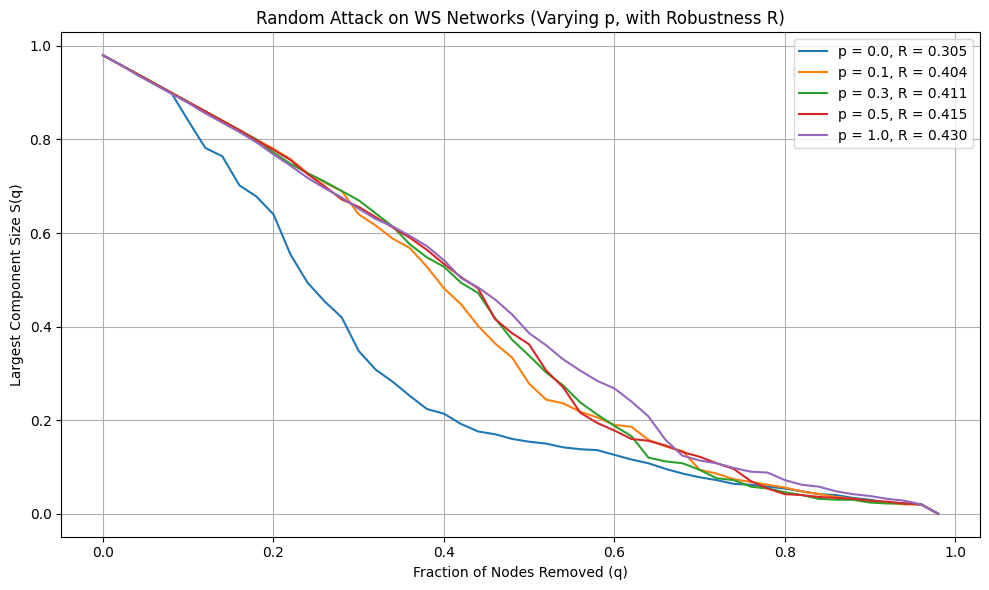

In [3]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def generate_ws_with_embedding(n, k, p, space_size=100):
    G = nx.watts_strogatz_graph(n=n, k=k, p=p)
    positions = {i: np.random.rand(2) * space_size for i in G.nodes()}
    nx.set_node_attributes(G, positions, 'pos')
    for u, v in G.edges():
        dist = np.linalg.norm(np.array(positions[u]) - np.array(positions[v]))
        G[u][v]['weight'] = dist
    return G

def random_attack(G, trials=5):
    N = G.number_of_nodes()
    S_all = np.zeros(N)

    for _ in range(trials):
        G_tmp = copy.deepcopy(G)
        nodes = list(G_tmp.nodes())
        np.random.shuffle(nodes)

        S_list = []
        for i, node in enumerate(nodes):
            G_tmp.remove_node(node)
            if G_tmp.number_of_nodes() == 0:
                S_list.append(0)
            else:
                largest_cc = max(nx.connected_components(G_tmp), key=len)
                S_list.append(len(largest_cc) / N)
        S_all += np.array(S_list)

    S_avg = S_all / trials
    q_list = np.arange(N) / N
    return q_list, S_avg

def compute_robustness(S_list):
    return np.sum(S_list) / len(S_list)

# 参数设置
n = 50              # 节点数
k = 4               # 每个节点连接的邻居数（必须为偶数）
p_values = [0.0, 0.1, 0.3, 0.5, 1.0]  # 重连概率
trials = 10         # 随机攻击重复次数
results = {}

# 执行随机攻击实验
for p in p_values:
    G = generate_ws_with_embedding(n=n, k=k, p=p)
    q, S = random_attack(G, trials=trials)
    R = compute_robustness(S)
    results[p] = (q, S, R)

# 绘图
plt.figure(figsize=(10, 6))
for p in p_values:
    q, S, R = results[p]
    plt.plot(q, S, label=f'p = {p}, R = {R:.3f}')

plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Random Attack on WS Networks (Varying p, with Robustness R)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

低p的结构中，节点彼此局部连接，容错性差；随着p增大，网络引入了更多的随机边，路径更短了，结构更具韧性。在小世界结构中具备良好的平衡。

### 对ER网络进行随机攻击

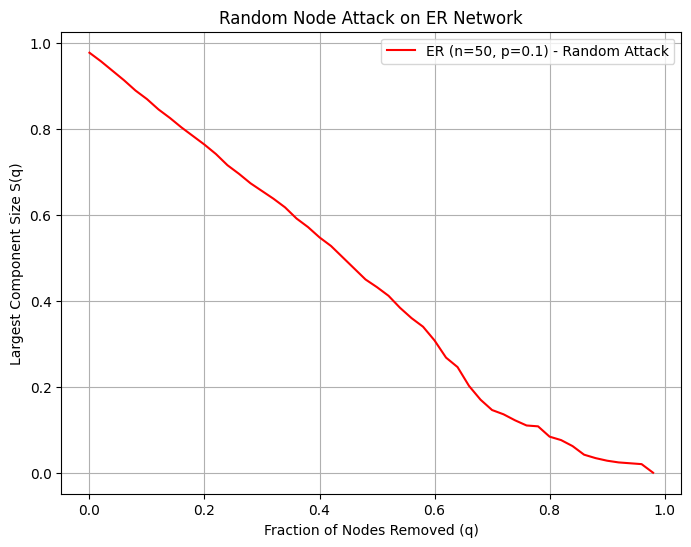

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def generate_er_with_embedding(n=50, p=0.1, space_size=100):
    G = nx.erdos_renyi_graph(n=n, p=p)
    positions = {i: np.random.rand(2) * space_size for i in G.nodes()}
    nx.set_node_attributes(G, positions, 'pos')

    for u, v in G.edges():
        dist = np.linalg.norm(np.array(positions[u]) - np.array(positions[v]))
        G[u][v]['weight'] = dist

    return G, positions

def random_attack(G, trials=1):
    N = G.number_of_nodes()
    S_all = np.zeros(N)

    for _ in range(trials):
        G_tmp = copy.deepcopy(G)
        nodes = list(G_tmp.nodes())
        np.random.shuffle(nodes)

        S_list = []
        for i, node in enumerate(nodes):
            G_tmp.remove_node(node)
            if G_tmp.number_of_nodes() == 0:
                S_list.append(0)
            else:
                largest_cc = max(nx.connected_components(G_tmp), key=len)
                S_list.append(len(largest_cc) / N)

        S_all += np.array(S_list)

    S_avg = S_all / trials
    q_list = np.arange(N) / N
    return q_list, S_avg

# 🔧 参数设置
n = 50
p = 0.1
trials = 10

# 生成 ER 网络并进行随机攻击
G_er, pos_er = generate_er_with_embedding(n=n, p=p)
q, S = random_attack(G_er, trials=trials)

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(q, S, label=f'ER (n={n}, p={p}) - Random Attack', color='red')
plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Random Node Attack on ER Network")
plt.grid(True)
plt.legend()
plt.show()

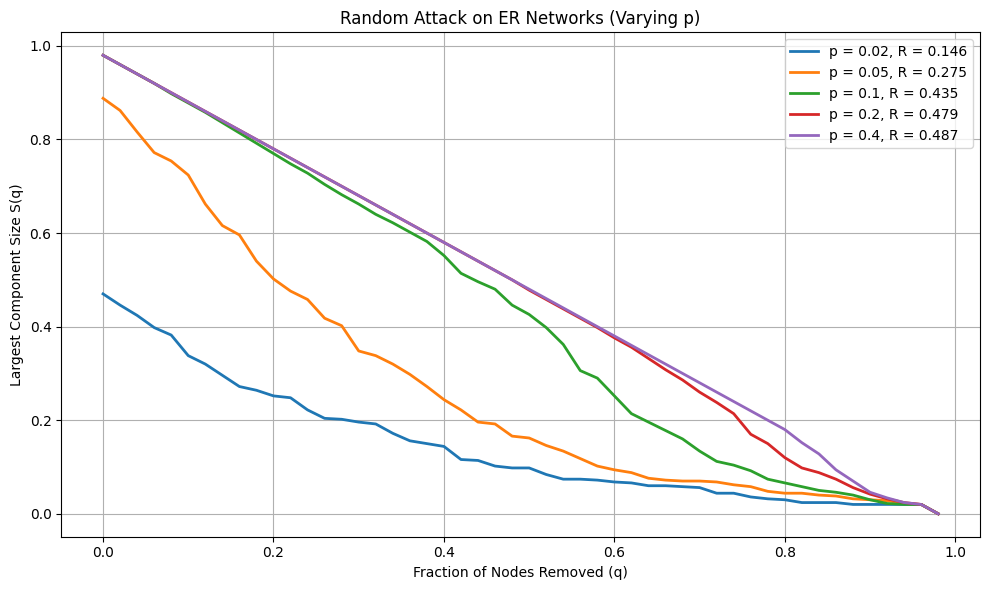

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def generate_er_graph(n, p):
    return nx.erdos_renyi_graph(n=n, p=p)

def random_attack(G, trials=5):
    N = G.number_of_nodes()
    S_all = np.zeros(N)

    for _ in range(trials):
        G_tmp = copy.deepcopy(G)
        nodes = list(G_tmp.nodes())
        np.random.shuffle(nodes)

        S_list = []
        for node in nodes:
            G_tmp.remove_node(node)
            if G_tmp.number_of_nodes() == 0:
                S_list.append(0)
            else:
                largest_cc = max(nx.connected_components(G_tmp), key=len)
                S_list.append(len(largest_cc) / N)
        S_all += np.array(S_list)

    S_avg = S_all / trials
    q_list = np.arange(N) / N
    return q_list, S_avg

def compute_robustness(S_list):
    return np.sum(S_list) / len(S_list)

# 参数设置
n = 50
p_values = [0.02, 0.05, 0.1, 0.2, 0.4]
trials = 10
results = {}

# 多个 p 值下执行实验
for p in p_values:
    G = generate_er_graph(n=n, p=p)
    q, S = random_attack(G, trials=trials)
    R = compute_robustness(S)
    results[p] = (q, S, R)

# 绘图
plt.figure(figsize=(10, 6))
for p in p_values:
    q, S, R = results[p]
    plt.plot(q, S, label=f'p = {p}, R = {R:.3f}', linewidth=2)

plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Random Attack on ER Networks (Varying p)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

所有的模型中，连接数越多（平均度越高），鲁棒性更强，
BA网络更鲁棒于随机攻击，因为其hub通常不会被随机优先击中，
WS网络在中等p时获得最佳平衡，兼具局部聚集和全球连通，
ER网络结构最依赖于连接边的概率，鲁棒性提升完全依赖连接密度。

## 度攻击

### ER网络的度攻击

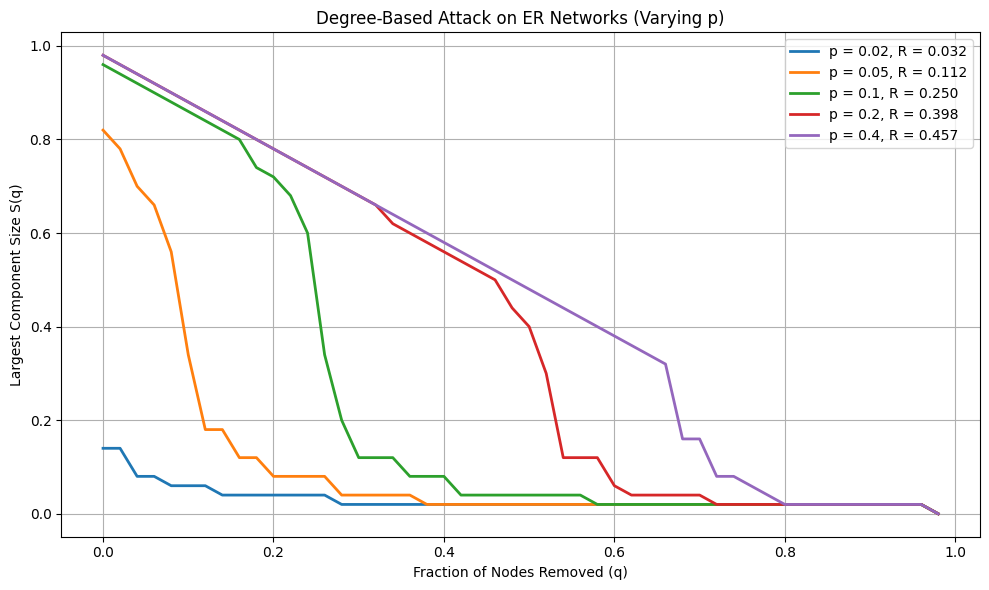

In [6]:
# 给出对比不同参数的ER网络在度攻击下的表现的python代码
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def generate_er_graph(n, p):
    return nx.erdos_renyi_graph(n=n, p=p)

def degree_attack(G):
    G_tmp = copy.deepcopy(G)
    N = G_tmp.number_of_nodes()
    S_list = []

    for _ in range(N):
        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
            continue
        degree_dict = dict(G_tmp.degree())
        max_node = max(degree_dict, key=degree_dict.get)
        G_tmp.remove_node(max_node)

        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
        else:
            largest_cc = max(nx.connected_components(G_tmp), key=len)
            S_list.append(len(largest_cc) / N)

    q_list = np.arange(N) / N
    return q_list, S_list

def compute_robustness(S_list):
    return np.sum(S_list) / len(S_list)

# 参数设置
n = 50
p_values = [0.02, 0.05, 0.1, 0.2, 0.4]
results = {}

# 执行度攻击并收集结果
for p in p_values:
    G = generate_er_graph(n=n, p=p)
    q, S = degree_attack(G)
    R = compute_robustness(S)
    results[p] = (q, S, R)

# 绘图
plt.figure(figsize=(10, 6))
for p in p_values:
    q, S, R = results[p]
    plt.plot(q, S, label=f'p = {p}, R = {R:.3f}', linewidth=2)

plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Degree-Based Attack on ER Networks (Varying p)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

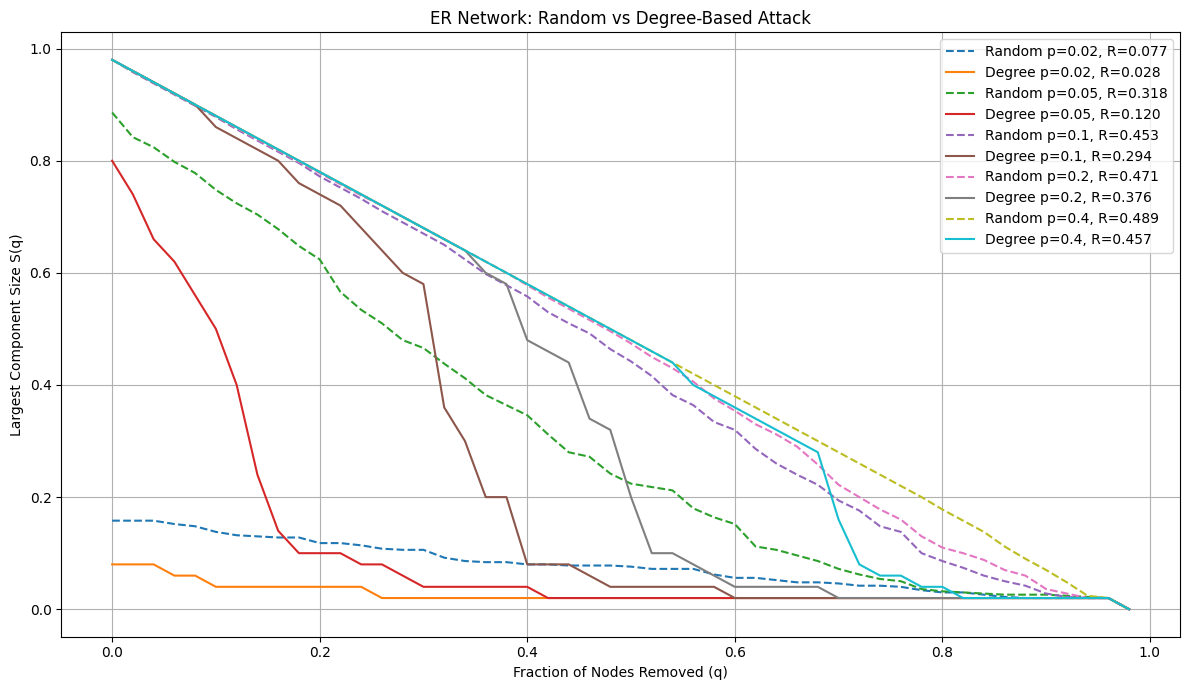

In [7]:

# 比较ER网络随机攻击和度攻击的鲁棒性
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def generate_er_graph(n, p):
    return nx.erdos_renyi_graph(n=n, p=p)

def random_attack(G, trials=5):
    N = G.number_of_nodes()
    S_all = np.zeros(N)

    for _ in range(trials):
        G_tmp = copy.deepcopy(G)
        nodes = list(G_tmp.nodes())
        np.random.shuffle(nodes)

        S_list = []
        for node in nodes:
            G_tmp.remove_node(node)
            if G_tmp.number_of_nodes() == 0:
                S_list.append(0)
            else:
                largest_cc = max(nx.connected_components(G_tmp), key=len)
                S_list.append(len(largest_cc) / N)
        S_all += np.array(S_list)

    S_avg = S_all / trials
    q_list = np.arange(N) / N
    return q_list, S_avg

def degree_attack(G):
    G_tmp = copy.deepcopy(G)
    N = G_tmp.number_of_nodes()
    S_list = []

    for _ in range(N):
        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
            continue

        degree_dict = dict(G_tmp.degree())
        max_node = max(degree_dict, key=degree_dict.get)
        G_tmp.remove_node(max_node)

        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
        else:
            largest_cc = max(nx.connected_components(G_tmp), key=len)
            S_list.append(len(largest_cc) / N)

    q_list = np.arange(N) / N
    return q_list, S_list

def compute_robustness(S_list):
    return np.sum(S_list) / len(S_list)

# 实验参数
n = 50
p_values = [0.02, 0.05, 0.1, 0.2, 0.4]
trials = 10
results_random = {}
results_degree = {}

# 运行实验
for p in p_values:
    G = generate_er_graph(n=n, p=p)

    q_rand, S_rand = random_attack(G, trials=trials)
    R_rand = compute_robustness(S_rand)
    results_random[p] = (q_rand, S_rand, R_rand)

    q_deg, S_deg = degree_attack(G)
    R_deg = compute_robustness(S_deg)
    results_degree[p] = (q_deg, S_deg, R_deg)

# 绘图比较
plt.figure(figsize=(12, 7))
for p in p_values:
    q_rand, S_rand, R_rand = results_random[p]
    q_deg, S_deg, R_deg = results_degree[p]
    plt.plot(q_rand, S_rand, linestyle='--', label=f'Random p={p}, R={R_rand:.3f}')
    plt.plot(q_deg, S_deg, linestyle='-', label=f'Degree p={p}, R={R_deg:.3f}')

plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("ER Network: Random vs Degree-Based Attack")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### WS网络的度攻击

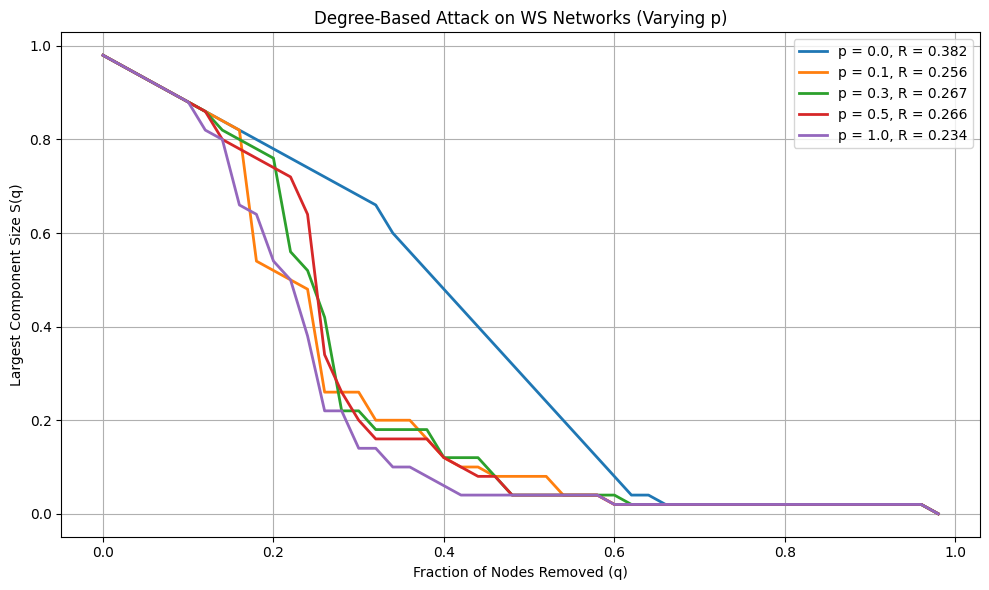

In [9]:

# 比较不同参数的WS网络在度攻击的情况下鲁棒性情况
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def generate_ws_graph(n, k, p):
    return nx.watts_strogatz_graph(n=n, k=k, p=p)

def degree_attack(G):
    G_tmp = copy.deepcopy(G)
    N = G_tmp.number_of_nodes()
    S_list = []

    for _ in range(N):
        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
            continue
        degree_dict = dict(G_tmp.degree())
        max_node = max(degree_dict, key=degree_dict.get)
        G_tmp.remove_node(max_node)

        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
        else:
            largest_cc = max(nx.connected_components(G_tmp), key=len)
            S_list.append(len(largest_cc) / N)

    q_list = np.arange(N) / N
    return q_list, S_list

def compute_robustness(S_list):
    return np.sum(S_list) / len(S_list)

# 设置参数
n = 50              # 节点数
k = 4               # 每个节点连接的邻居数（应为偶数）
p_values = [0.0, 0.1, 0.3, 0.5, 1.0]  # 不同的重连概率
results = {}

# 执行度攻击实验
for p in p_values:
    G = generate_ws_graph(n=n, k=k, p=p)
    q, S = degree_attack(G)
    R = compute_robustness(S)
    results[p] = (q, S, R)

# 绘制结果
plt.figure(figsize=(10, 6))
for p in p_values:
    q, S, R = results[p]
    plt.plot(q, S, label=f'p = {p}, R = {R:.3f}', linewidth=2)

plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Degree-Based Attack on WS Networks (Varying p)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

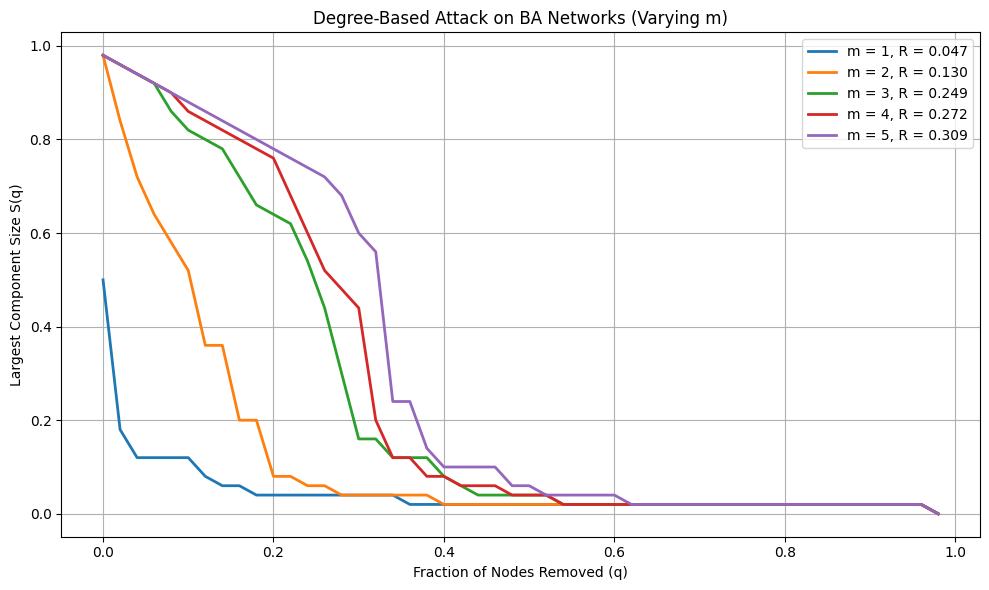

In [10]:

### BA网络的度攻击
# 不同参数m下的BA网络在执行度攻击时的连通性和鲁棒性
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def generate_ba_graph(n, m):
    return nx.barabasi_albert_graph(n=n, m=m)

def degree_attack(G):
    G_tmp = copy.deepcopy(G)
    N = G_tmp.number_of_nodes()
    S_list = []

    for _ in range(N):
        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
            continue
        degree_dict = dict(G_tmp.degree())
        max_node = max(degree_dict, key=degree_dict.get)
        G_tmp.remove_node(max_node)

        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
        else:
            largest_cc = max(nx.connected_components(G_tmp), key=len)
            S_list.append(len(largest_cc) / N)

    q_list = np.arange(N) / N
    return q_list, S_list

def compute_robustness(S_list):
    return np.sum(S_list) / len(S_list)

# 参数设置
n = 50
m_values = [1, 2, 3, 4, 5]  # 不同的连接数 m
results = {}

# 度攻击模拟
for m in m_values:
    G = generate_ba_graph(n=n, m=m)
    q, S = degree_attack(G)
    R = compute_robustness(S)
    results[m] = (q, S, R)

# 绘图
plt.figure(figsize=(10, 6))
for m in m_values:
    q, S, R = results[m]
    plt.plot(q, S, label=f'm = {m}, R = {R:.3f}', linewidth=2)

plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Degree-Based Attack on BA Networks (Varying m)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

正如我们此前看过的经典文献，BA网络对随机攻击鲁棒，但是对度攻击非常敏感；m越小，网络越稀疏，越容易被集中打击摧毁；提高m增加平均度和冗余，明显增强鲁棒性

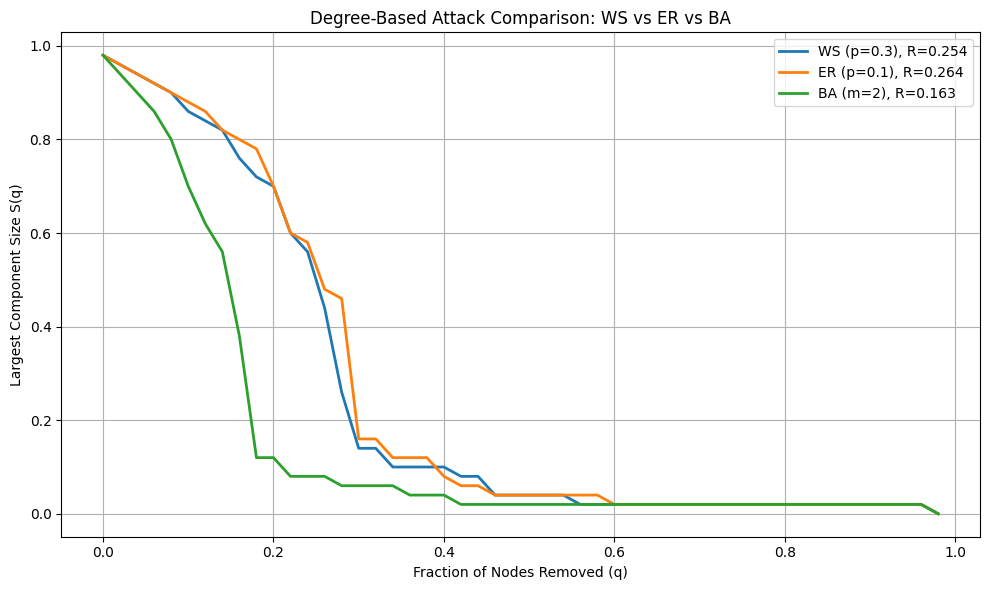

In [11]:
# 比较WS、ER和BA网络的度攻击
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def degree_attack(G):
    G_tmp = copy.deepcopy(G)
    N = G_tmp.number_of_nodes()
    S_list = []

    for _ in range(N):
        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
            continue
        degrees = dict(G_tmp.degree())
        max_node = max(degrees, key=degrees.get)
        G_tmp.remove_node(max_node)

        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
        else:
            largest_cc = max(nx.connected_components(G_tmp), key=len)
            S_list.append(len(largest_cc) / N)

    q_list = np.arange(N) / N
    return q_list, S_list

def compute_robustness(S_list):
    return np.sum(S_list) / len(S_list)

# 参数设置
n = 50
ws_k = 4
ws_p = 0.3
er_p = 0.1
ba_m = 2

# 生成网络
G_ws = nx.watts_strogatz_graph(n=n, k=ws_k, p=ws_p)
G_er = nx.erdos_renyi_graph(n=n, p=er_p)
G_ba = nx.barabasi_albert_graph(n=n, m=ba_m)

# 执行度攻击
q_ws, S_ws = degree_attack(G_ws)
q_er, S_er = degree_attack(G_er)
q_ba, S_ba = degree_attack(G_ba)

# 计算鲁棒性
R_ws = compute_robustness(S_ws)
R_er = compute_robustness(S_er)
R_ba = compute_robustness(S_ba)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(q_ws, S_ws, label=f'WS (p={ws_p}), R={R_ws:.3f}', linewidth=2)
plt.plot(q_er, S_er, label=f'ER (p={er_p}), R={R_er:.3f}', linewidth=2)
plt.plot(q_ba, S_ba, label=f'BA (m={ba_m}), R={R_ba:.3f}', linewidth=2)

plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Degree-Based Attack Comparison: WS vs ER vs BA")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

衍生讨论：
尽管BA网络在随机攻击下鲁棒性较好，但对于有针对性的攻击（如度攻击）极其敏感；
WS网络在中等重连概率下兼顾了局部连接和远程连通性，表现出较佳的攻击容忍性；
ER网络表现较为中庸，其鲁棒性受连接概率强烈影响；
结构异质性虽然提升效率，但是同时也削弱了鲁棒性！

## 介数攻击
介数中心性（Betweenness centrality）是衡量一个节点在网络中作为最短路径中转站的概率，$C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}$，介数攻击的核心思想，每次移除“当前介数中心性最大”的节点，破坏网络的核心通信路径。
### 对ER网络对介数攻击

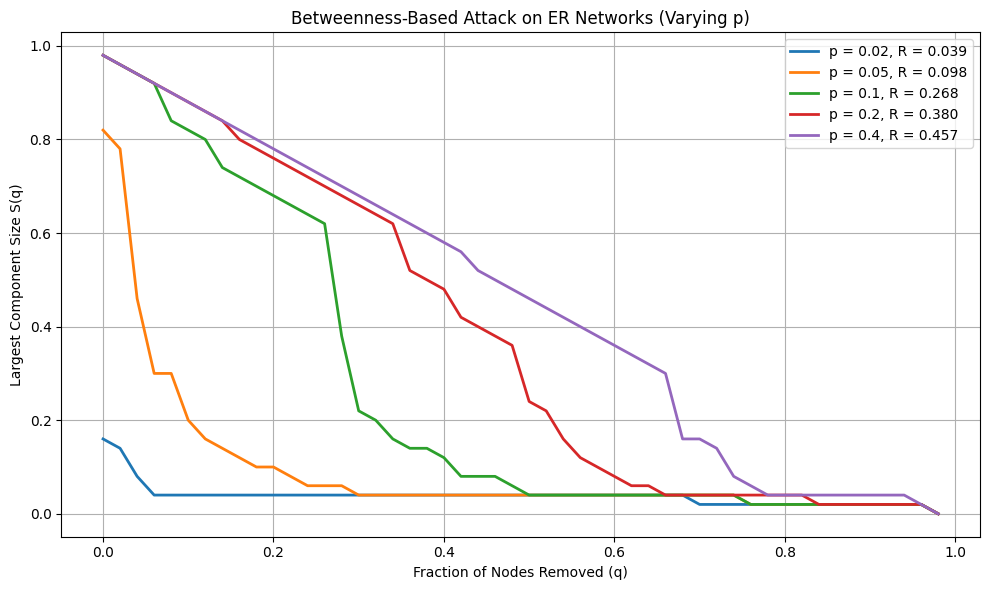

In [12]:
# 介数攻击（每次移除介数中心性最大的节点）
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def generate_er_graph(n, p):
    return nx.erdos_renyi_graph(n=n, p=p)

def betweenness_attack(G):
    G_tmp = copy.deepcopy(G)
    N = G_tmp.number_of_nodes()
    S_list = []

    for _ in range(N):
        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
            continue
        # 计算当前节点的介数中心性
        betweenness = nx.betweenness_centrality(G_tmp)
        max_node = max(betweenness, key=betweenness.get)
        G_tmp.remove_node(max_node)

        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
        else:
            largest_cc = max(nx.connected_components(G_tmp), key=len)
            S_list.append(len(largest_cc) / N)

    q_list = np.arange(N) / N
    return q_list, S_list

def compute_robustness(S_list):
    return np.sum(S_list) / len(S_list)

# 参数设置
n = 50
p_values = [0.02, 0.05, 0.1, 0.2, 0.4]
results = {}

# 多个 p 值下执行介数攻击
for p in p_values:
    G = generate_er_graph(n=n, p=p)
    q, S = betweenness_attack(G)
    R = compute_robustness(S)
    results[p] = (q, S, R)

# 绘图展示
plt.figure(figsize=(10, 6))
for p in p_values:
    q, S, R = results[p]
    plt.plot(q, S, label=f'p = {p}, R = {R:.3f}', linewidth=2)

plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Betweenness-Based Attack on ER Networks (Varying p)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

在低p值时，网络的平均度非常低，原始结构中已几乎不具备冗余路径，节点之间通信严重依赖少数中心桥梁节（介数高），一旦这些节点被移除，网络会迅速断裂成多个孤立小簇，即“几刀断全网”。 网络连接概率p越大，ER网络对介数攻击越鲁棒；

### 对WS网络对介数攻击

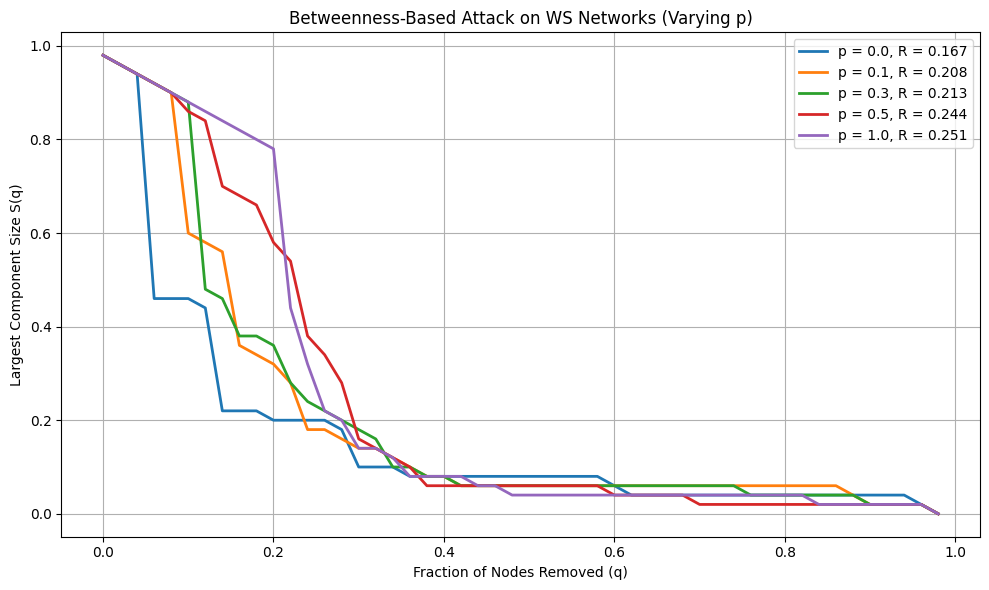

In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def generate_ws_graph(n, k, p):
    return nx.watts_strogatz_graph(n=n, k=k, p=p)

def betweenness_attack(G):
    G_tmp = copy.deepcopy(G)
    N = G_tmp.number_of_nodes()
    S_list = []

    for _ in range(N):
        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
            continue
        # 重新计算当前介数中心性
        betweenness = nx.betweenness_centrality(G_tmp)
        max_node = max(betweenness, key=betweenness.get)
        G_tmp.remove_node(max_node)

        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
        else:
            largest_cc = max(nx.connected_components(G_tmp), key=len)
            S_list.append(len(largest_cc) / N)

    q_list = np.arange(N) / N
    return q_list, S_list

def compute_robustness(S_list):
    return np.sum(S_list) / len(S_list)

# 参数设置
n = 50               # 节点数
k = 4                # 每个节点连接的邻居数（应为偶数）
p_values = [0.0, 0.1, 0.3, 0.5, 1.0]  # 重连概率
results = {}

# 多个 p 值下执行介数攻击
for p in p_values:
    G = generate_ws_graph(n=n, k=k, p=p)
    q, S = betweenness_attack(G)
    R = compute_robustness(S)
    results[p] = (q, S, R)

# 绘图
plt.figure(figsize=(10, 6))
for p in p_values:
    q, S, R = results[p]
    plt.plot(q, S, label=f'p = {p}, R = {R:.3f}', linewidth=2)

plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Betweenness-Based Attack on WS Networks (Varying p)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

注意，在WS网络建模中p=0是完成规则图，高聚类，长路径； $0<p<1$ 是小世界网络，聚类仍高但是平均路径会迅速下降；p=1是随机图，聚类降低，路径最短，接近ER网络
中等重连概率下（0.3-0.5）下，小世界网络实现了结构优化平衡：路径短、中心性分散、鲁棒性强。
在网络设计中，完全规则或完全随机都不是最鲁棒的选择，适度重连更能提升抗打击能力！


### BA网络的介数攻击

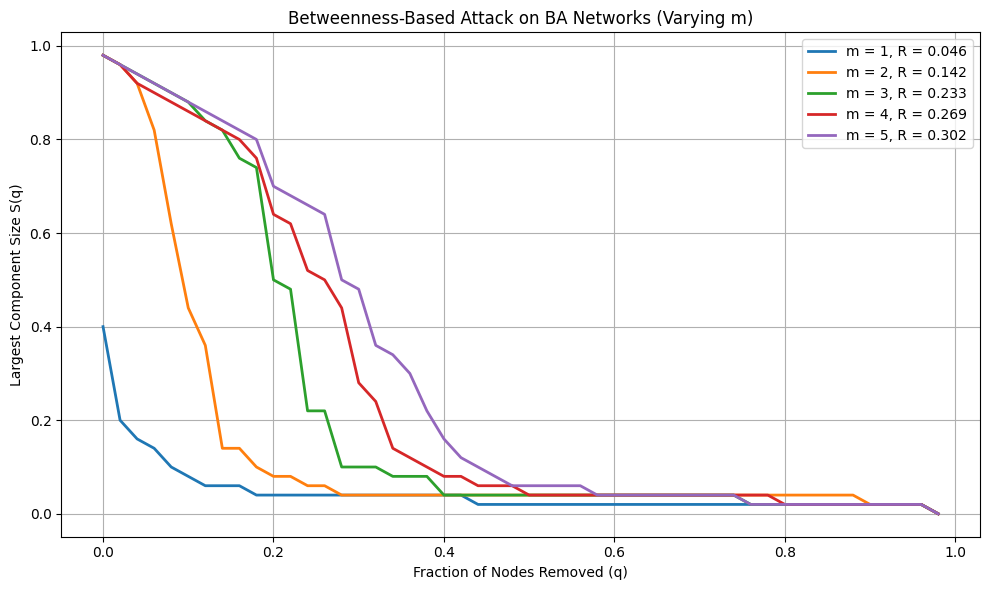

In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

def generate_ba_graph(n, m):
    return nx.barabasi_albert_graph(n=n, m=m)

def betweenness_attack(G):
    G_tmp = copy.deepcopy(G)
    N = G_tmp.number_of_nodes()
    S_list = []

    for _ in range(N):
        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
            continue
        # 计算当前所有节点的介数中心性
        betweenness = nx.betweenness_centrality(G_tmp)
        max_node = max(betweenness, key=betweenness.get)
        G_tmp.remove_node(max_node)

        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
        else:
            largest_cc = max(nx.connected_components(G_tmp), key=len)
            S_list.append(len(largest_cc) / N)

    q_list = np.arange(N) / N
    return q_list, S_list

def compute_robustness(S_list):
    return np.sum(S_list) / len(S_list)

# 设置参数
n = 50
m_values = [1, 2, 3, 4, 5]  # 不同连接数 m
results = {}

# 执行介数攻击并记录结果
for m in m_values:
    G = generate_ba_graph(n=n, m=m)
    q, S = betweenness_attack(G)
    R = compute_robustness(S)
    results[m] = (q, S, R)

# 绘图展示
plt.figure(figsize=(10, 6))
for m in m_values:
    q, S, R = results[m]
    plt.plot(q, S, label=f'm = {m}, R = {R:.3f}', linewidth=2)

plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Betweenness-Based Attack on BA Networks (Varying m)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 加权度攻击
加权度是指“节点连接的边的权重之和”（也称“节点强度”）。加权度攻击定义为每轮攻击中，选择当前加权度最大的节点进行移除，然后更新网络状态。它考虑的不是连接的数量，而是连接强度的总和。

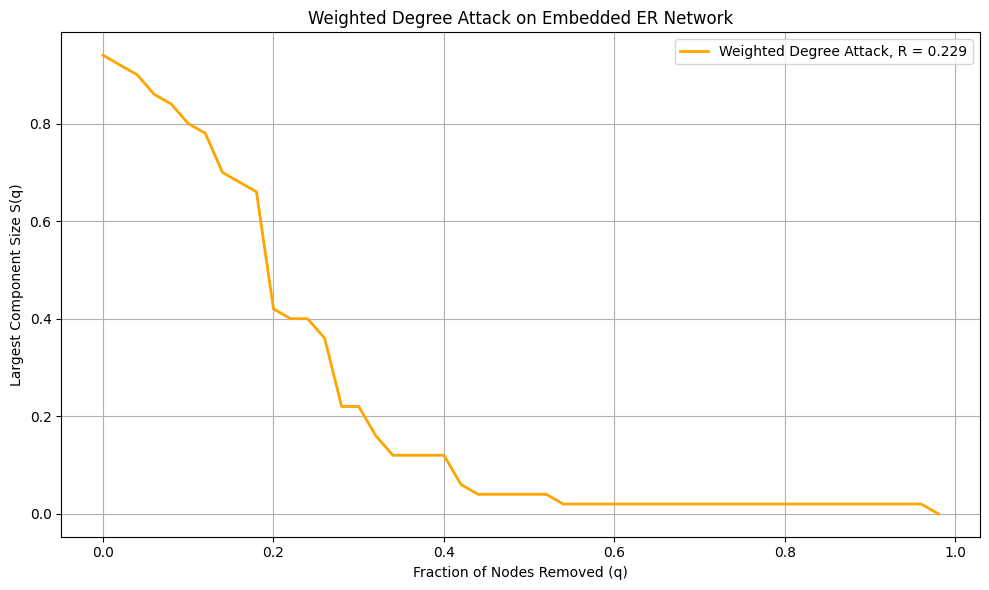

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def generate_weighted_er_graph(n, p):
    # 生成 ER 网络
    G = nx.erdos_renyi_graph(n=n, p=p)

    # 为每个节点随机分配二维坐标
    pos = {i: np.random.rand(2) for i in G.nodes}

    # 计算每条边的欧几里得距离作为权重
    for u, v in G.edges():
        dist = np.linalg.norm(pos[u] - pos[v])
        G[u][v]['weight'] = dist

    return G, pos

def weighted_degree_attack(G):
    G_tmp = G.copy()
    N = G_tmp.number_of_nodes()
    S_list = []

    for _ in range(N):
        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
            continue

        # 计算每个节点的加权度（节点强度）
        weighted_degrees = {
            node: sum(data['weight'] for _, _, data in G_tmp.edges(node, data=True))
            for node in G_tmp.nodes()
        }
        max_node = max(weighted_degrees, key=weighted_degrees.get)
        G_tmp.remove_node(max_node)

        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
        else:
            largest_cc = max(nx.connected_components(G_tmp), key=len)
            S_list.append(len(largest_cc) / N)

    q_list = np.arange(N) / N
    return q_list, S_list

def compute_robustness(S_list):
    return np.sum(S_list) / len(S_list)

# 参数设置
n = 50      # 节点数
p = 0.1     # 边的生成概率

# 生成嵌入式 ER 网络
G, pos = generate_weighted_er_graph(n=n, p=p)

# 执行加权度攻击
q, S = weighted_degree_attack(G)
R = compute_robustness(S)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(q, S, color='orange', linewidth=2, label=f'Weighted Degree Attack, R = {R:.3f}')
plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Weighted Degree Attack on Embedded ER Network")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

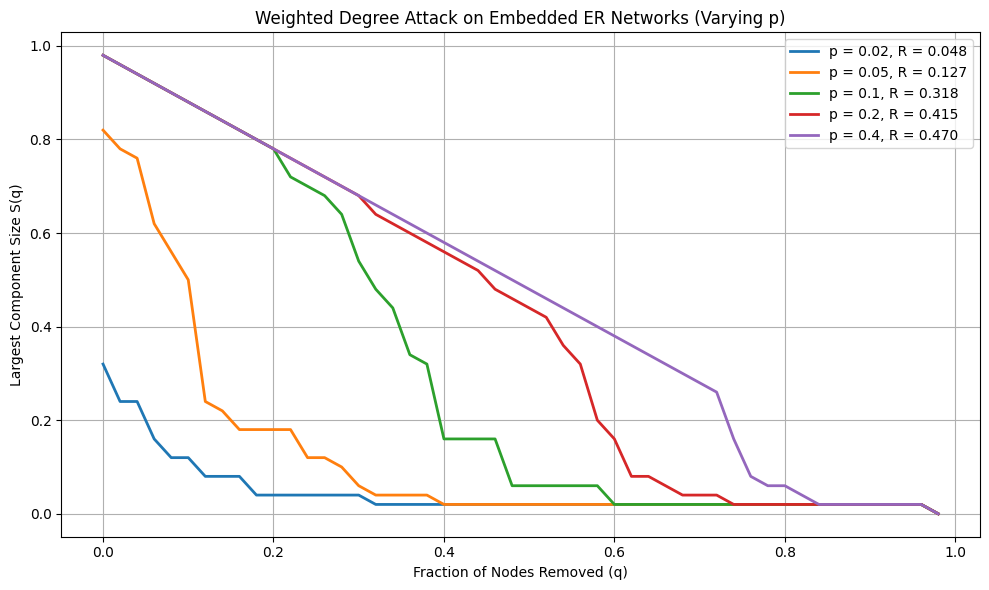

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def generate_weighted_er_graph(n, p):
    """生成带二维坐标嵌入并赋权的 ER 网络"""
    G = nx.erdos_renyi_graph(n=n, p=p)
    pos = {i: np.random.rand(2) for i in G.nodes()}
    for u, v in G.edges():
        dist = np.linalg.norm(pos[u] - pos[v])
        G[u][v]['weight'] = dist
    return G, pos

def weighted_degree_attack(G):
    """执行加权度攻击（移除加权度最大的节点）"""
    G_tmp = G.copy()
    N = G_tmp.number_of_nodes()
    S_list = []

    for _ in range(N):
        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
            continue

        # 每个节点的加权度（节点强度）
        weighted_degrees = {
            node: sum(data['weight'] for _, _, data in G_tmp.edges(node, data=True))
            for node in G_tmp.nodes()
        }
        max_node = max(weighted_degrees, key=weighted_degrees.get)
        G_tmp.remove_node(max_node)

        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
        else:
            largest_cc = max(nx.connected_components(G_tmp), key=len)
            S_list.append(len(largest_cc) / N)

    q_list = np.arange(N) / N
    return q_list, S_list

def compute_robustness(S_list):
    return np.sum(S_list) / len(S_list)

# 参数设置
n = 50
p_values = [0.02, 0.05, 0.1, 0.2, 0.4]  # 边生成概率
results = {}

# 不同 p 值下执行攻击
for p in p_values:
    G, _ = generate_weighted_er_graph(n=n, p=p)
    q, S = weighted_degree_attack(G)
    R = compute_robustness(S)
    results[p] = (q, S, R)

# 绘图
plt.figure(figsize=(10, 6))
for p in p_values:
    q, S, R = results[p]
    plt.plot(q, S, label=f'p = {p}, R = {R:.3f}', linewidth=2)

plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Weighted Degree Attack on Embedded ER Networks (Varying p)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

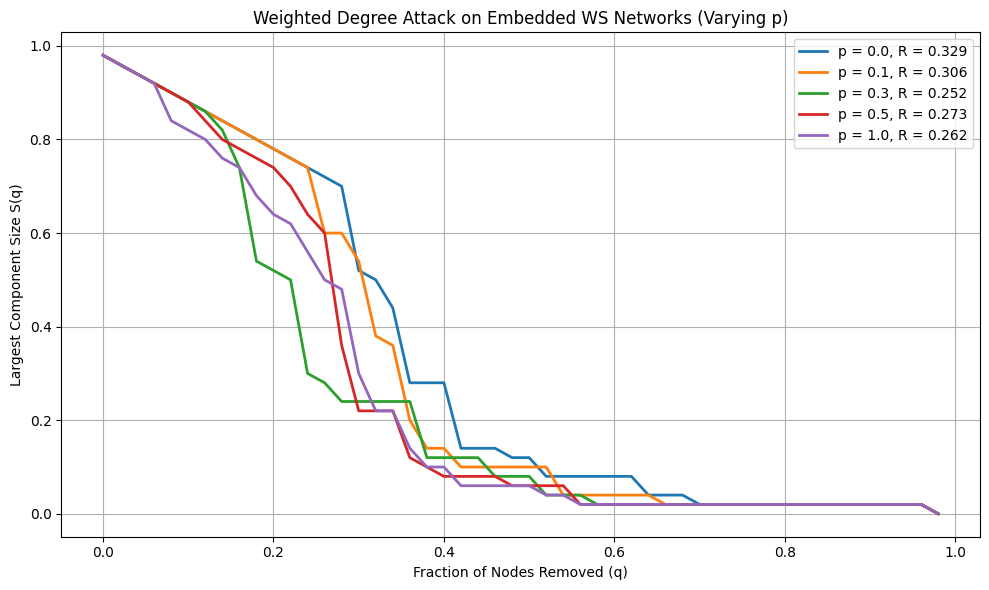

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def generate_weighted_ws_graph(n, k, p):
    """生成带二维坐标嵌入并赋权的 WS 网络"""
    G = nx.watts_strogatz_graph(n=n, k=k, p=p)
    pos = {i: np.random.rand(2) for i in G.nodes()}
    for u, v in G.edges():
        dist = np.linalg.norm(pos[u] - pos[v])
        G[u][v]['weight'] = dist
    return G, pos

def weighted_degree_attack(G):
    """执行加权度攻击（移除加权度最大的节点）"""
    G_tmp = G.copy()
    N = G_tmp.number_of_nodes()
    S_list = []

    for _ in range(N):
        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
            continue
        weighted_degrees = {
            node: sum(data['weight'] for _, _, data in G_tmp.edges(node, data=True))
            for node in G_tmp.nodes()
        }
        max_node = max(weighted_degrees, key=weighted_degrees.get)
        G_tmp.remove_node(max_node)

        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
        else:
            largest_cc = max(nx.connected_components(G_tmp), key=len)
            S_list.append(len(largest_cc) / N)

    q_list = np.arange(N) / N
    return q_list, S_list

def compute_robustness(S_list):
    """计算鲁棒性积分 R"""
    return np.sum(S_list) / len(S_list)

# 参数设置
n = 50        # 节点数
k = 4         # 环状连接数（必须为偶数）
p_values = [0.0, 0.1, 0.3, 0.5, 1.0]  # 不同重连概率
results = {}

# 对不同 p 值进行加权度攻击分析
for p in p_values:
    G, _ = generate_weighted_ws_graph(n=n, k=k, p=p)
    q, S = weighted_degree_attack(G)
    R = compute_robustness(S)
    results[p] = (q, S, R)

# 绘图展示
plt.figure(figsize=(10, 6))
for p in p_values:
    q, S, R = results[p]
    plt.plot(q, S, label=f'p = {p}, R = {R:.3f}', linewidth=2)

plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Weighted Degree Attack on Embedded WS Networks (Varying p)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

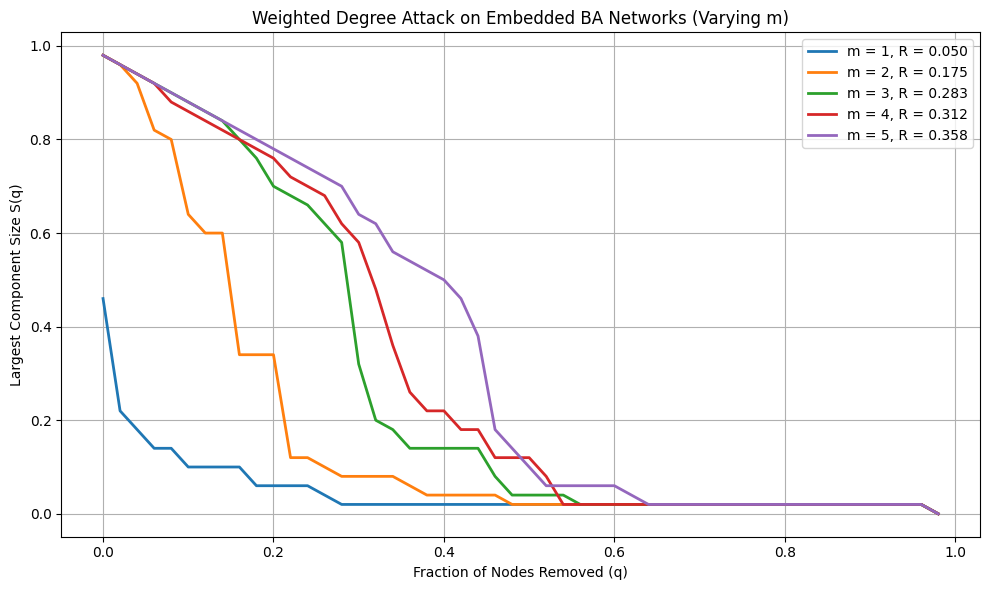

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def generate_weighted_ba_graph(n, m):
    """生成带有二维坐标嵌入并加权的 BA 网络"""
    G = nx.barabasi_albert_graph(n=n, m=m)
    pos = {i: np.random.rand(2) for i in G.nodes()}
    for u, v in G.edges():
        dist = np.linalg.norm(pos[u] - pos[v])
        G[u][v]['weight'] = dist
    return G, pos

def weighted_degree_attack(G):
    """加权度攻击：每次移除加权度最大的节点"""
    G_tmp = G.copy()
    N = G_tmp.number_of_nodes()
    S_list = []

    for _ in range(N):
        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
            continue

        weighted_degrees = {
            node: sum(data['weight'] for _, _, data in G_tmp.edges(node, data=True))
            for node in G_tmp.nodes()
        }
        max_node = max(weighted_degrees, key=weighted_degrees.get)
        G_tmp.remove_node(max_node)

        if G_tmp.number_of_nodes() == 0:
            S_list.append(0)
        else:
            largest_cc = max(nx.connected_components(G_tmp), key=len)
            S_list.append(len(largest_cc) / N)

    q_list = np.arange(N) / N
    return q_list, S_list

def compute_robustness(S_list):
    """鲁棒性积分 R"""
    return np.sum(S_list) / len(S_list)

# 参数设置
n = 50                     # 节点总数
m_values = [1, 2, 3, 4, 5]  # 不同连接数参数
results = {}

# 执行攻击并记录每个 m 的结果
for m in m_values:
    G, _ = generate_weighted_ba_graph(n=n, m=m)
    q, S = weighted_degree_attack(G)
    R = compute_robustness(S)
    results[m] = (q, S, R)

# 绘图展示
plt.figure(figsize=(10, 6))
for m in m_values:
    q, S, R = results[m]
    plt.plot(q, S, label=f'm = {m}, R = {R:.3f}', linewidth=2)

plt.xlabel("Fraction of Nodes Removed (q)")
plt.ylabel("Largest Component Size S(q)")
plt.title("Weighted Degree Attack on Embedded BA Networks (Varying m)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 重新评估攻击
以上几种攻击方式皆为静态攻击，当我们将网络看作一个动态系统，我们可以尝试进行动态攻击……
顾名思义，重新评估攻击（每次攻击后重新计算指标，再选下一个目标）。
重新评估攻击也称动态攻击或自适应攻击，是一种攻击策略，其核心思想是：在每一轮节点移除之后，重新计算所有节点的结构指标（如度、介数、加权度、影响力等），然后选择当前最关键的节点再次移除。

## 动态资源目标攻击
资源中心：借用生态学中的生态位的概念，将